## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw/heart_disease_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

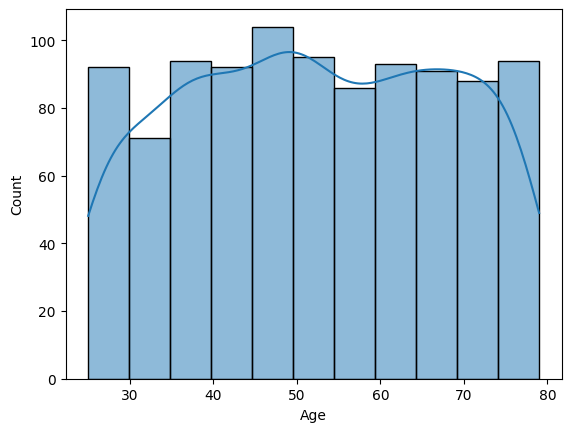

In [8]:
sns.histplot(x='Age', data=data, kde = True)
plt.show()

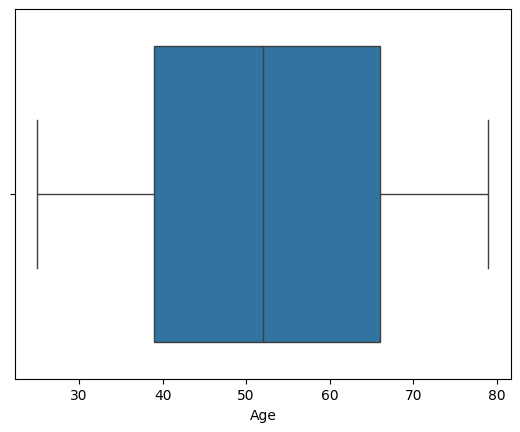

In [11]:
sns.boxplot(x='Age', data=data)
plt.show()

In [12]:
data['Age'].describe()

count    1000.000000
mean       52.293000
std        15.727126
min        25.000000
25%        39.000000
50%        52.000000
75%        66.000000
max        79.000000
Name: Age, dtype: float64

- Age of the patient in years is from 25 to 79 max.

In [13]:
data['Heart Disease'].value_counts()

Heart Disease
0    608
1    392
Name: count, dtype: int64

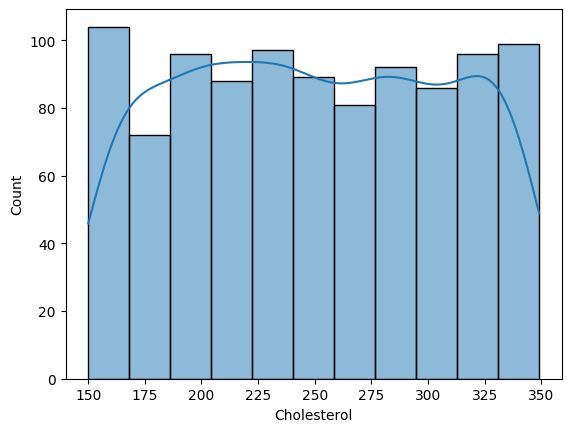

In [15]:
sns.histplot(x='Cholesterol', data=data, kde = True)
plt.show()

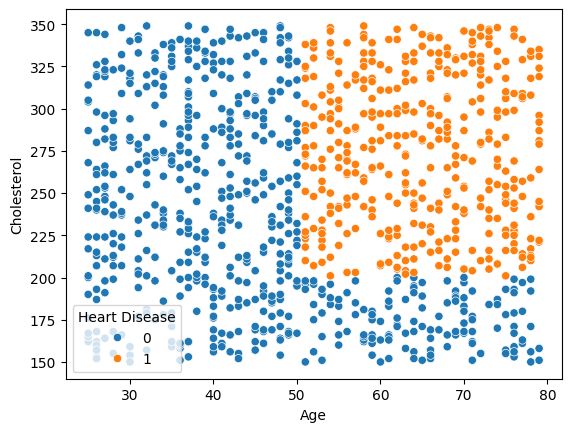

In [17]:
sns.scatterplot(x='Age', y='Cholesterol', data=data, hue = 'Heart Disease')
plt.show()

This visualization indicates that heart disease risk increases significantly with age.
While cholesterol levels show overlap between classes, combining age with other
clinical features is likely to improve predictive performance. If the age of the person is above 50 and has colestrol then it is obivous for him to get the heart disease.


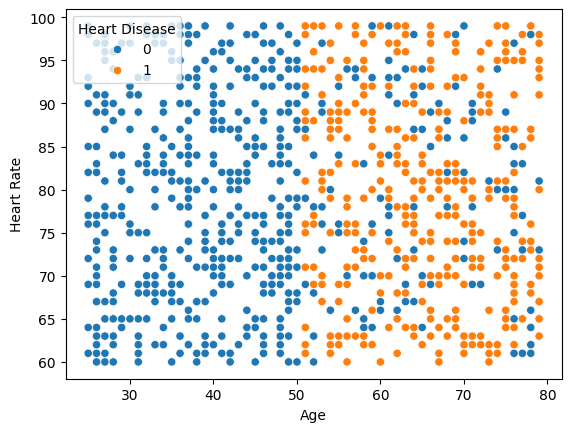

In [18]:
sns.scatterplot(x='Age', y='Heart Rate', data=data, hue = 'Heart Disease')
plt.show() 

Age is the primary differentiator
- A clear transition is observed around the 50-year age mark:
 - Individuals below 50 are predominantly free of heart disease.
 - Individuals above 50 show a substantially higher proportion of heart disease cases.
 - This reinforces the well-established medical understanding that age is one of the strongest risk factors for cardiovascular disease.

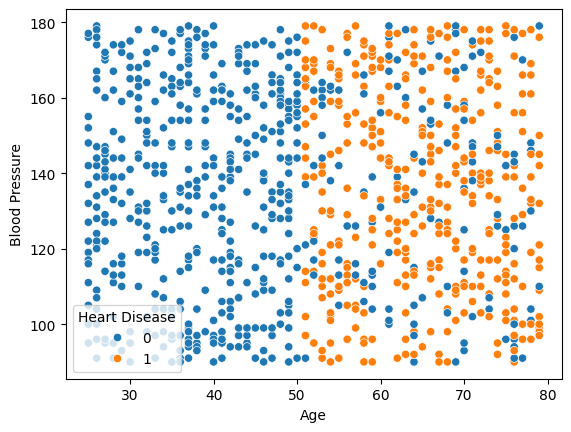

In [22]:
sns.scatterplot(x='Age', y='Blood Pressure', data=data, hue = 'Heart Disease')
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [26]:
data.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

In [29]:
data['Smoking'].value_counts()

Smoking
Never      338
Current    336
Former     326
Name: count, dtype: int64

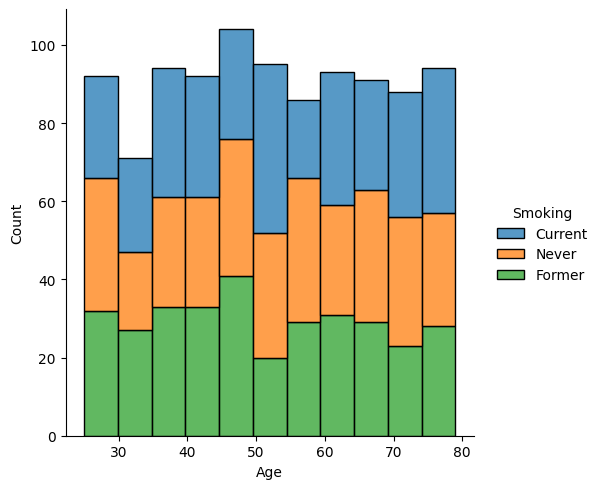

In [43]:
sns.displot(data=data, x="Age", hue="Smoking", multiple="stack")
plt.show()

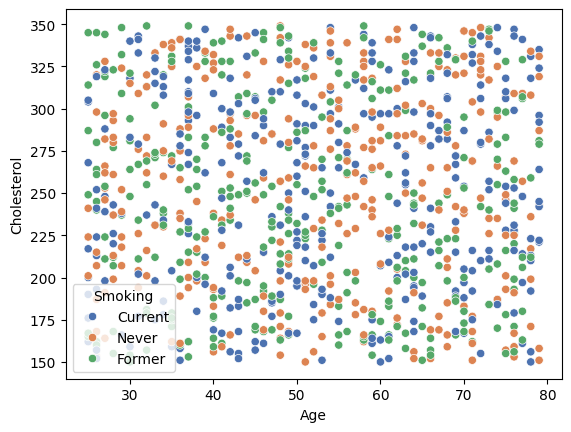

In [41]:
sns.scatterplot(x='Age', y='Cholesterol', data=data, hue = 'Smoking',palette='deep')
plt.show()

- Smoking doenot have much impact as we can see from the plot

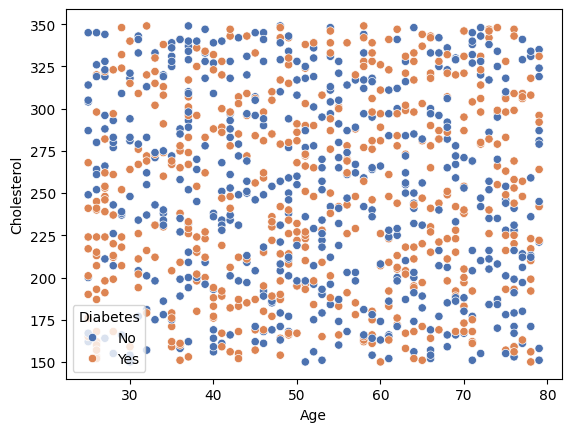

In [ ]:
sns.scatterplot(x='Age', y='Cholesterol', data=data, hue = 'Diabetes',palette='deep')
plt.show()

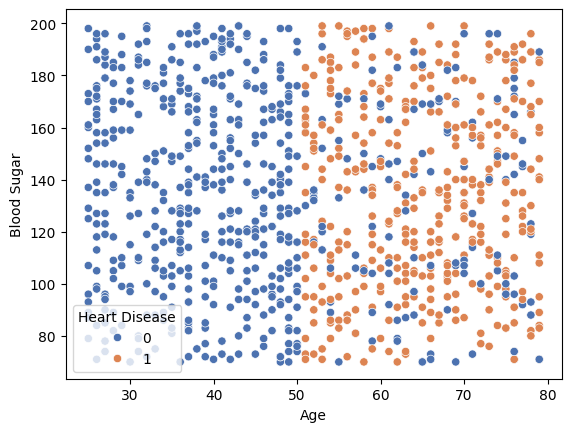

In [86]:
sns.scatterplot(x='Age', y='Blood Sugar', data=data, hue = 'Heart Disease',palette='deep')
plt.show()

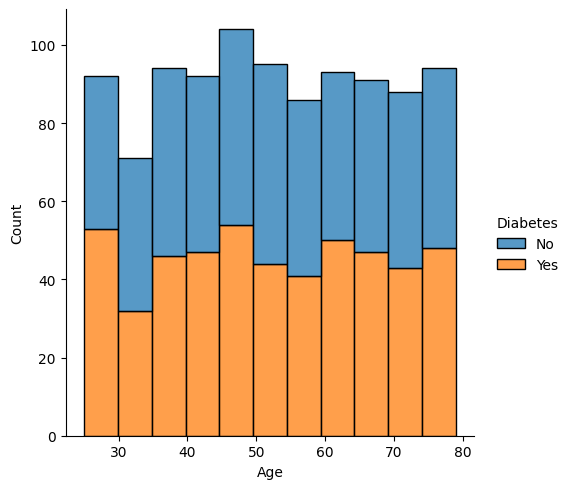

In [50]:
sns.displot(data=data, x="Age", hue="Diabetes", multiple="stack")
plt.show()

<Axes: xlabel='Age', ylabel='Family History'>

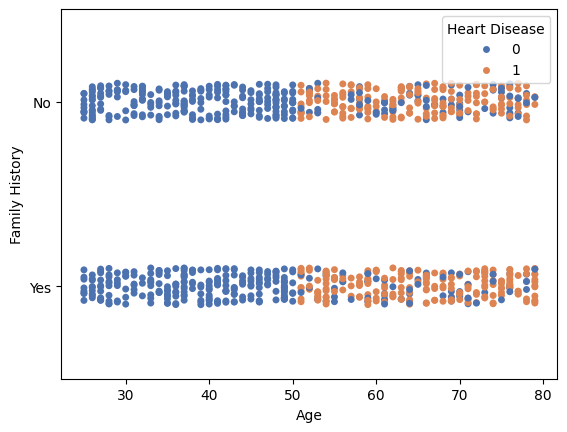

In [57]:
sns.stripplot(data=data, x="Age", y="Family History",hue = "Heart Disease", palette="deep")

In [58]:
data.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

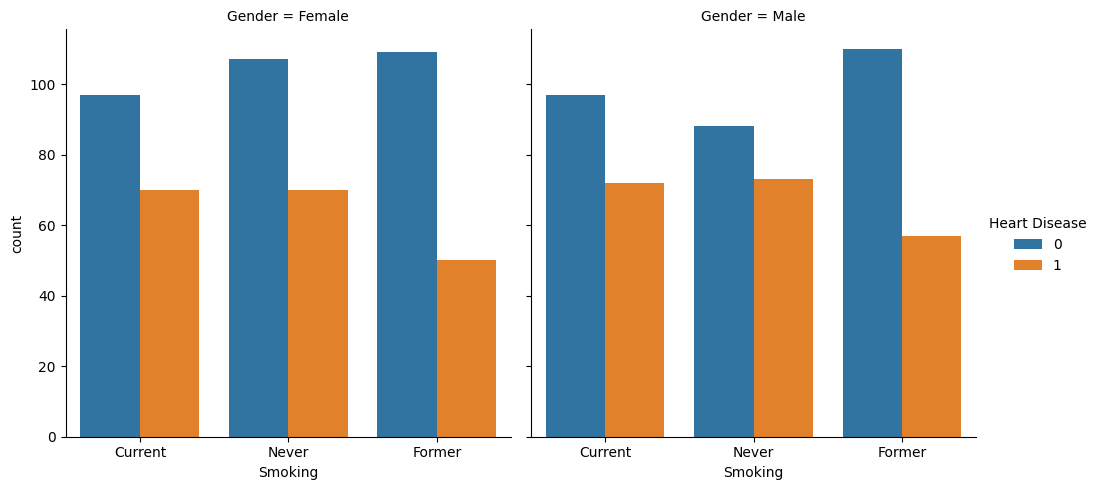

In [68]:
sns.catplot(
    data=data,
    x="Smoking",
    hue="Heart Disease",
    col="Gender",
    kind="count"
)
plt.show()


- Heart disease in male is slightly higher than female

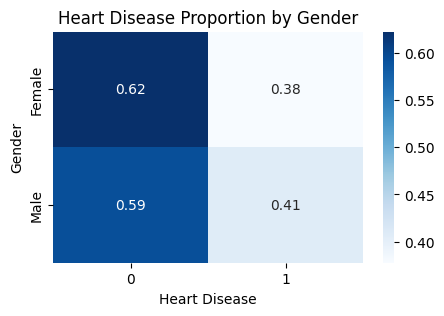

In [75]:
heatmap_df = pd.crosstab(
    data["Gender"],
    data["Heart Disease"],
    normalize="index"   # <-- normalize rows (per gender)
)

plt.figure(figsize=(5, 3))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Heart Disease Proportion by Gender")
plt.ylabel("Gender")
plt.xlabel("Heart Disease")
plt.show()

Heart disease prevalence is slightly higher in males
- Males: 41%
- Females: 38%
- Difference is present but not extreme
- The gap (~3%) suggests gender alone is not a strong predictor
- Other factors (age, cholesterol, diabetes, smoking) likely play a larger role

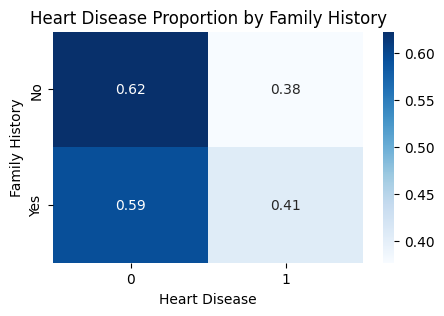

In [77]:
heatmap_df = pd.crosstab(
    data["Family History"],
    data["Heart Disease"],
    normalize="index"   # <-- normalize rows (per gender)
)

plt.figure(figsize=(5, 3))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Heart Disease Proportion by Family History")
plt.ylabel("Family History")
plt.xlabel("Heart Disease")
plt.show()

The heatmap illustrates heart disease prevalence stratified by family history.
Individuals with a family history of heart disease show a slightly higher prevalence
(41%) compared to those without a family history (38%). While family history is a
known risk factor, the modest difference indicates that heart disease risk is driven
by multiple interacting factors rather than heredity alone.


Family History (Yes / No)

Heart Disease (0 / 1)

In [87]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(
    data["Family History"],
    data["Heart Disease"]
)

contingency_table

Heart Disease,0,1
Family History,,
No,312,189
Yes,296,203


In [88]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value

(np.float64(0.7971914272189841), np.float64(0.371934415422823))

A chi-square test of independence was conducted to evaluate the
association between family history and heart disease.

The test yielded a chi-square statistic of 0.80 and a p-value of 0.37.
Since the p-value is greater than the 0.05 significance level, we fail
to reject the null hypothesis. This indicates that there is no
statistically significant association between family history and heart
disease in this dataset.

Although individuals with a family history show a slightly higher
prevalence of heart disease, the difference is not statistically
meaningful and may be attributed to random variation.


In [89]:
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
cramers_v


np.float64(0.02823457857342631)